# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Installed citypy
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#form API Url
base_url="http://api.openweathermap.org/data/2.5/weather?"
query_url= base_url +"&appid="+ weather_api_key + "&units=Imperial" + "&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?&appid=1ff1334ef774262915d515ac0b20639a&units=Imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
  
# Create empty lists to append data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

#set record counter
record_count=1

#loop through cities list
for city in cities:
    response = requests.get(query_url + city).json()
    

    city_name.append(response["name"])
    cloudiness.append(response["clouds"]["all"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])
    humidity.append(response["main"]["humidity"])
    max_temp.append(response["main"]["temp_max"])
    lat.append(response["coord"]["lat"])
    lng.append(response["coord"]["lon"])
    wind_speed.append(response["wind"]["speed"])
    city_record = response["name"]
    
    record_count+=1
       
    print(f"Processing Record {record_count} | {city_record}")



    

Processing Record 2 | Bredasdorp
Processing Record 3 | Zhigansk
Processing Record 4 | Port Elizabeth
Processing Record 5 | Pevek
Processing Record 6 | Jiangyou
Processing Record 7 | Hithadhoo
Processing Record 8 | East London
Processing Record 9 | Albany
Processing Record 10 | Cherskiy
Processing Record 11 | Katsuura
Processing Record 12 | Ushuaia
Processing Record 13 | Fort Nelson
Processing Record 14 | Béboto
Processing Record 15 | Zafra
Processing Record 16 | Nikolskoye
Processing Record 17 | Iqaluit
Processing Record 18 | Alofi
Processing Record 19 | Henties Bay
Processing Record 20 | Qaanaaq
Processing Record 21 | Siverek
Processing Record 22 | Verkhnevilyuysk
Processing Record 23 | Assiut
Processing Record 24 | Kaitangata
Processing Record 25 | Yellowknife
Processing Record 26 | Sonoita
Processing Record 27 | Thompson
Processing Record 28 | Carnarvon
Processing Record 29 | Puerto Ayora
Processing Record 30 | ‘Āhuimanu


KeyError: 'name'

In [7]:
#Turn appended lists into dictionary
city_data_dict = {'City':city_name,
                'Cloudiness':cloudiness,
                'Country':country,
                'Date':date,
                'Humidity':humidity,
                'Lat':lat,
                'Lng':lng,
                'Max Temp':max_temp,
                'Wind Speed':wind_speed}

#Turn dictionary into dataframe
city_data_df = pd.DataFrame(city_data_dict)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,100,ZA,1605997515,72,-34.53,20.04,62.60,9.17
1,Zhigansk,100,RU,1605997515,91,66.77,123.37,-4.32,20.20
2,Port Elizabeth,0,ZA,1605997486,77,-33.92,25.57,66.20,25.28
3,Pevek,99,RU,1605997516,97,69.70,170.31,9.37,2.28
4,Jiangyou,100,CN,1605997517,65,31.77,104.72,46.18,1.23
5,Hithadhoo,100,MV,1605997517,77,-0.60,73.08,81.90,10.58
6,East London,98,ZA,1605997517,57,-33.02,27.91,72.72,14.99
7,Albany,95,US,1605997371,50,42.60,-73.97,46.00,4.00
8,Cherskiy,100,RU,1605997518,95,68.75,161.30,5.56,2.66
9,Katsuura,40,JP,1605997518,62,35.13,140.30,53.60,5.82


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
clean_city_data_df=city_data_df.drop(city_data_df.loc[city_data_df['Humidity']>=100].index, inplace=False)
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,100,ZA,1605997515,72,-34.53,20.04,62.60,9.17
1,Zhigansk,100,RU,1605997515,91,66.77,123.37,-4.32,20.20
2,Port Elizabeth,0,ZA,1605997486,77,-33.92,25.57,66.20,25.28
3,Pevek,99,RU,1605997516,97,69.70,170.31,9.37,2.28
4,Jiangyou,100,CN,1605997517,65,31.77,104.72,46.18,1.23
5,Hithadhoo,100,MV,1605997517,77,-0.60,73.08,81.90,10.58
6,East London,98,ZA,1605997517,57,-33.02,27.91,72.72,14.99
7,Albany,95,US,1605997371,50,42.60,-73.97,46.00,4.00
8,Cherskiy,100,RU,1605997518,95,68.75,161.30,5.56,2.66
9,Katsuura,40,JP,1605997518,62,35.13,140.30,53.60,5.82


In [10]:
# Export the City_Data into a csv
clean_city_data_df.to_csv("weather.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

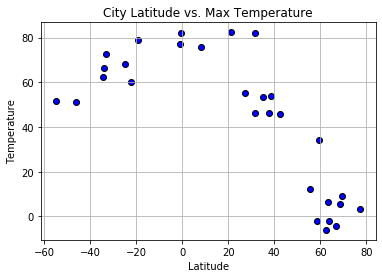

In [15]:
#create scatterplot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']
plt.scatter(x_values,y_values, c="blue", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

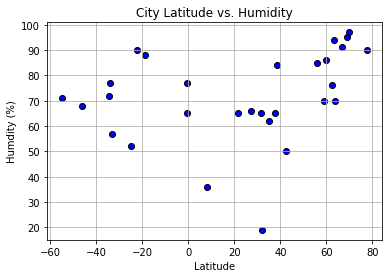

In [19]:
#create scatterplot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Humidity']
plt.scatter(x_values,y_values, c="blue", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humdity (%)')
plt.title("City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

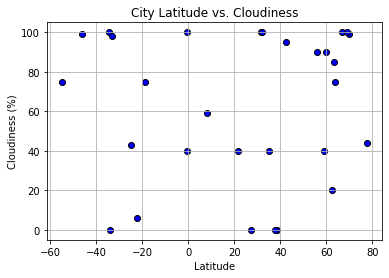

In [20]:
#create scatterplot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Cloudiness']
plt.scatter(x_values,y_values, c="blue", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

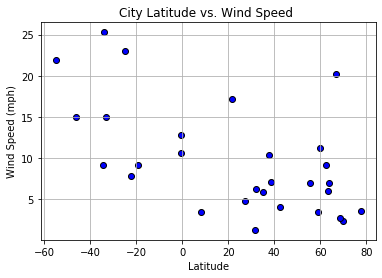

In [23]:
#create scatterplot
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Wind Speed']
plt.scatter(x_values,y_values, c="blue", edgecolor="black")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed ")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression